In [1]:
from google.colab import files
uploaded = files.upload()
# print(uploaded)

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  #print('User uploaded file "{ }" with length { } bytes'.format(fn, len(uploaded[fn])))

Saving data_processed.csv to data_processed.csv
User uploaded file "data_processed.csv" with length 525742 bytes


Load the Data

In [ ]:
# @title Default title text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

path = '/content/data_raw.csv'# @param {type:"string"}
sales = pd.read_csv(path, parse_dates=['week'])
display(sales)


,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
0,2016-10-31,1,135,True,black,10.16,6,06.Mobile phone accessories
1,2016-11-07,1,102,True,black,9.86,6,06.Mobile phone accessories
2,2016-11-14,1,110,True,black,10.24,6,06.Mobile phone accessories
3,2016-11-21,1,127,True,black,8.27,6,06.Mobile phone accessories
4,2016-11-28,1,84,True,black,8.83,6,06.Mobile phone accessories
...,...,...,...,...,...,...,...,...
4395,2018-08-27,44,20,False,black,53.99,6,09.Smartphone stands
4396,2018-09-03,44,14,False,NaN,52.99,6,09.Smartphone stands
4397,2018-09-10,44,22,True,black,44.99,6,09.Smartphone stands
4398,2018-09-17,44,28,True,NaN,42.99,6,09.Smartphone stands


Data Exploration

In [ ]:
# nunique
print("Colors", sales.color.nunique())
print("Vendors", sales.vendor.nunique())
print("functionality", sales.functionality.nunique())
print("sku", sales.sku.nunique())
print("\n Dtypes \n", sales.dtypes)


Colors 10
Vendors 10
functionality 12
sku 44

 Dtypes 
 week              datetime64[ns]
sku                        int64
weekly_sales               int64
feat_main_page              bool
color                     object
price                    float64
vendor                     int64
functionality             object
dtype: object


In [ ]:
# Describe
sales_stat = sales.describe()
display(sales_stat)
sales_stat = sales.describe(include = ["bool", "object"])
display(sales_stat)


,week,sku,weekly_sales,price,vendor
count,4400,4400.000000,4400.000000,4400.000000,4400.000000
mean,2017-10-12 12:00:00,22.500000,83.054773,44.432709,6.909091
min,2016-10-31 00:00:00,1.000000,0.000000,2.390000,1.000000
25%,2017-04-22 06:00:00,11.750000,11.000000,15.680000,6.000000
50%,2017-10-12 12:00:00,22.500000,25.000000,27.550000,6.500000
75%,2018-04-03 18:00:00,33.250000,70.000000,54.990000,9.000000
max,2018-09-24 00:00:00,44.000000,7512.000000,227.720000,10.000000
std,NaN,12.699868,288.000205,42.500295,2.503175


,feat_main_page,color,functionality
count,4400,4390,4400
unique,2,10,12
top,False,black,06.Mobile phone accessories
freq,2825,1691,1100


In [ ]:
# Value counts
print('\n', sales.feat_main_page.value_counts())
print('\n', sales.color.value_counts())
print('\n', sales.vendor.value_counts())
print('\n', sales.functionality.value_counts())


 feat_main_page
False    2825
True     1575
Name: count, dtype: int64

 color
black     1691
blue       700
red        500
green      400
grey       300
white      200
none       200
gold       199
purple     100
pink       100
Name: count, dtype: int64

 vendor
6     1200
10    1000
8      800
5      400
9      300
1      200
3      200
2      100
4      100
7      100
Name: count, dtype: int64

 functionality
06.Mobile phone accessories        1100
04.Selfie sticks                    700
09.Smartphone stands                600
02.Portable smartphone chargers     500
01.Streaming sticks                 400
07.Headphones                       200
11.Fitness trackers                 200
08.Digital pencils                  200
12.Flash drives                     200
03.Bluetooth speakers               100
10.VR headset                       100
05.Bluetooth tracker                100
Name: count, dtype: int64


In [ ]:
avg = sales.groupby("week")[["weekly_sales","price"]].mean().reset_index()
print(avg)

         week  weekly_sales      price
0  2016-10-31     62.659091  42.964773
1  2016-11-07     61.227273  40.994318
2  2016-11-14     63.431818  41.340227
3  2016-11-21     58.431818  40.385000
4  2016-11-28     63.090909  40.060000
..        ...           ...        ...
95 2018-08-27     97.409091  48.551591
96 2018-09-03     60.250000  47.006136
97 2018-09-10    125.340909  45.054091
98 2018-09-17    194.363636  43.186364
99 2018-09-24    207.068182  43.995227

[100 rows x 3 columns]


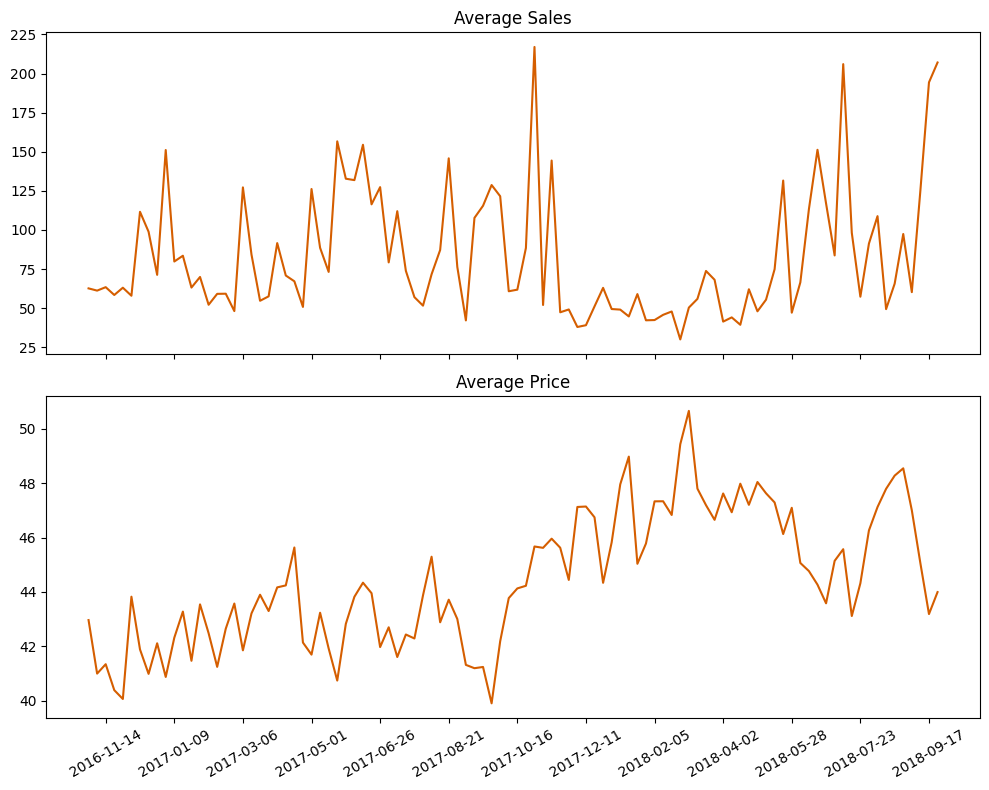

In [ ]:
# Plotting
color=sns.color_palette(palette='colorblind')[3]

x = avg["week"]
y = avg["weekly_sales"]
z = avg["price"]

plt.rcParams["figure.figsize"] = (10,8)
f, axarr = plt.subplots(2, sharex=True)

axarr[0].plot(x, y, color=color)
plt.xticks(rotation=30)
axarr[0].set_title('Average Sales')
axarr[0].set(xticks=avg.week[2::8])

axarr[1].plot(x, z, color=color)
plt.xticks(rotation=30)
axarr[1].set_title('Average Price')
axarr[1].set(xticks=avg.week[2::8])
plt.tight_layout()

# plt.savefig("Average_P_S.png", dpi=400,bbox_inches = 'tight')
plt.show()


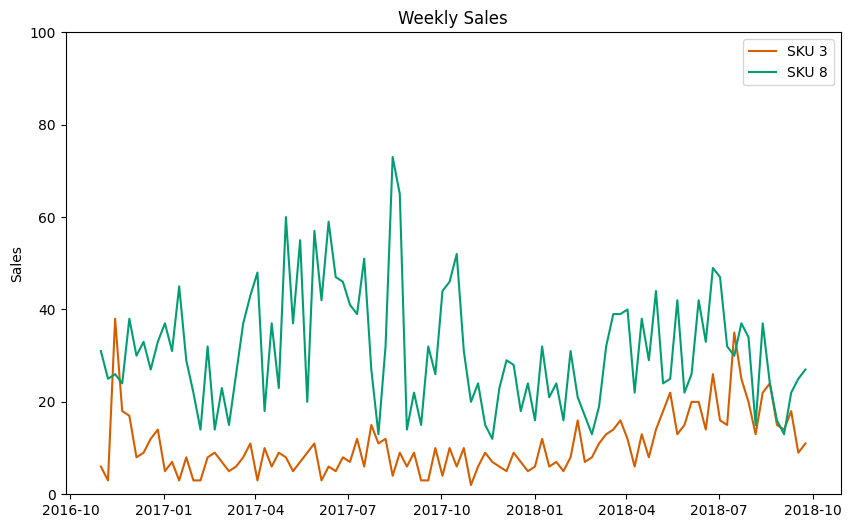

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(sales[sales.sku==3]["week"],sales[sales.sku==3]["weekly_sales"],color=sns.color_palette(palette='colorblind')[3],label="SKU 3")
plt.plot(sales[sales.sku==8]["week"],sales[sales.sku==8]["weekly_sales"],color=sns.color_palette(palette='colorblind')[2],label="SKU 8")
plt.title('Weekly Sales')
plt.ylabel('Sales')
plt.legend()
plt.ylim(0,100)

locs, labels=plt.xticks()
x_ticks = []

# plt.xticks(locs[2::8],avg.week[2::8], rotation=30)
# plt.savefig("Sales_2.png", dpi=400,bbox_inches = 'tight')
plt.show()

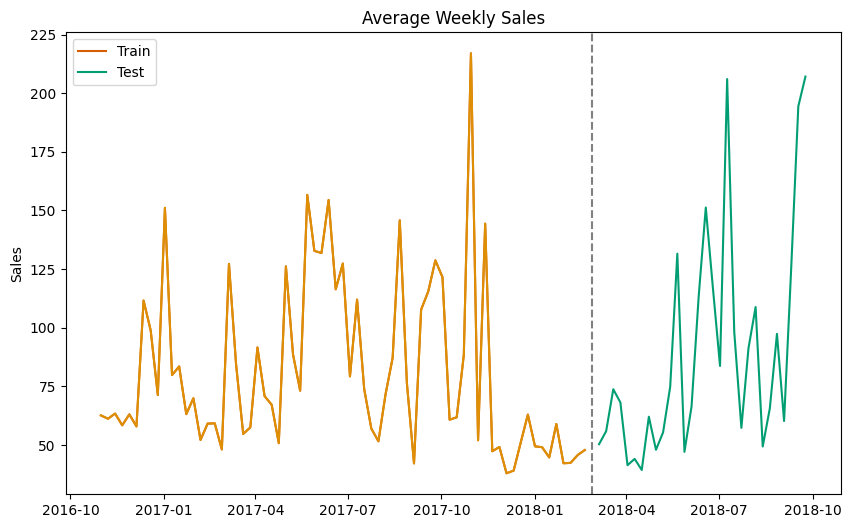

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(avg.iloc[:69]["week"], avg.iloc[:69]["weekly_sales"],color=sns.color_palette(palette='colorblind')[3],label="Train")
plt.plot(avg.iloc[:69]["week"], avg.iloc[:69]["weekly_sales"],color=sns.color_palette(palette='colorblind')[1])

plt.plot(avg.iloc[70:]["week"], avg.iloc[70:]["weekly_sales"],color=sns.color_palette(palette='colorblind')[2],label="Test")
plt.title("Average Weekly Sales")
plt.ylabel("Sales")
plt.axvline(x=avg.iloc[69]["week"],color='gray',linestyle='--')
plt.legend()

locs, labels=plt.xticks()
x_ticks = []

# plt.xticks(locs[2::8],avg.week[2::8], rotation=30)
# plt.savefig("Sales_split.png", dpi=400,bbox_inches = 'tight')
plt.show()


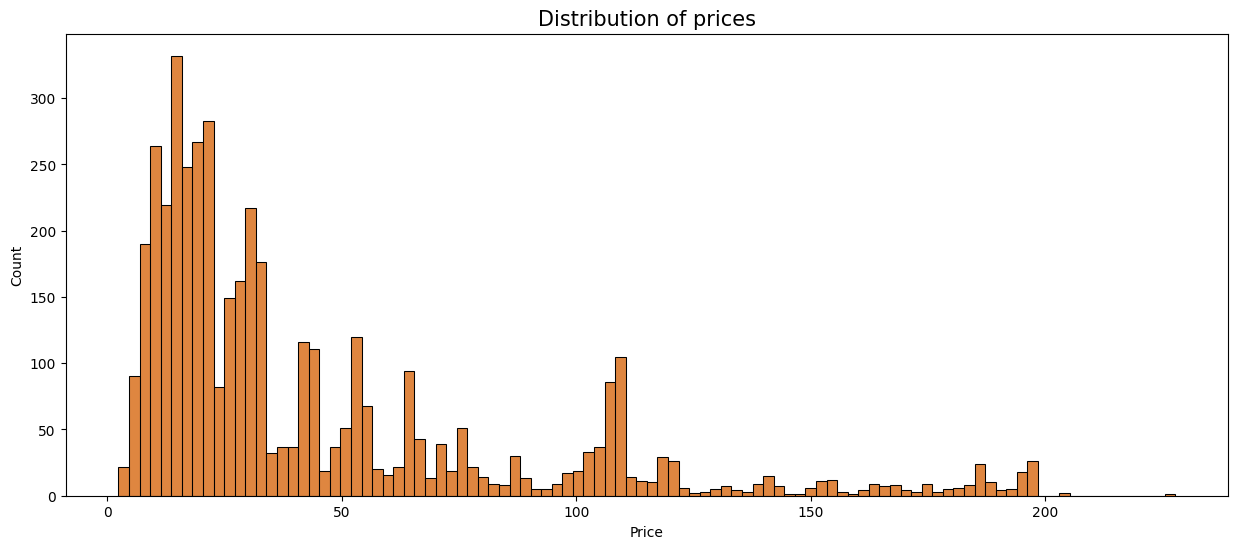

In [ ]:
plt.figure(figsize=(15,6))
graph = sns.histplot(data=sales["price"],bins=100, color=color)
plt.title('Distribution of prices', fontsize=15)
graph.set(xlabel = "Price")

# plt.savefig("price_distrib.png", dpi=400)
plt.show()

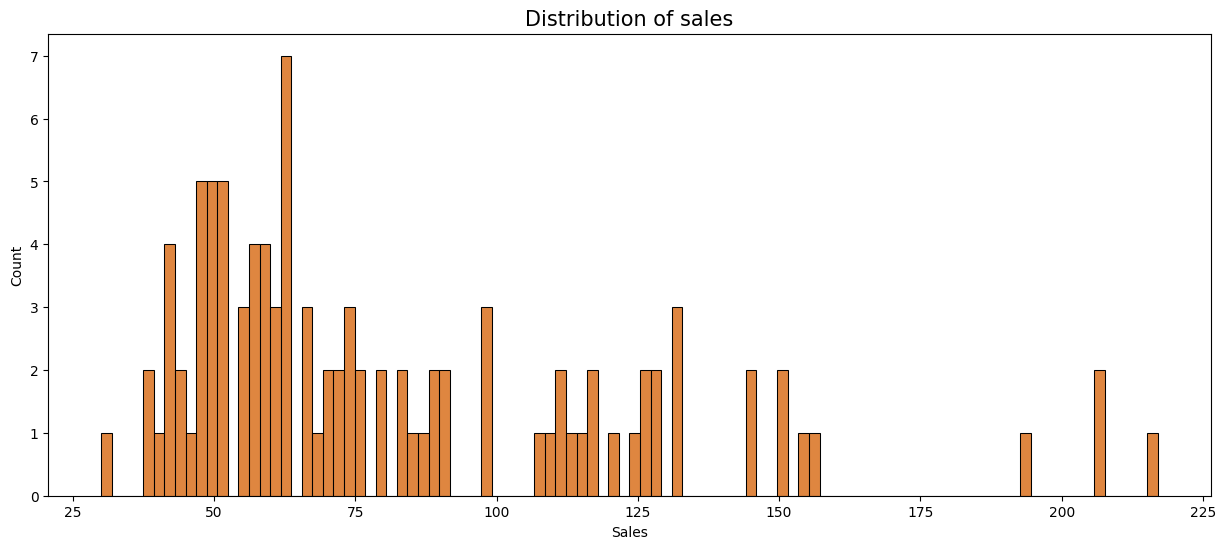

In [ ]:
plt.figure(figsize=(15,6))
graph = sns.histplot(data=avg["weekly_sales"],bins=100, color=color)
plt.title('Distribution of sales', fontsize=15)
graph.set(xlabel = "Sales")

# plt.savefig("sales_distrib.png", dpi=400)
plt.show()

Data preprocessing

In [ ]:
# 1)Missing Data
display(sales.isna().any())
# sales.dropna(inplace= True) #replace py False to proceed with missing data
display(sales[sales['color'].isnull()])
# command dropna=False, to count the number of NaN values
print('sku_44', sales[sales.sku == 44]["color"].value_counts(dropna=False))
print('sku_43', sales[sales.sku == 43]["color"].value_counts(dropna=False))
print('sku_42', sales[sales.sku == 42]["color"].value_counts(dropna=False))
print('sku_9', sales[sales.sku == 9]["color"].value_counts(dropna=False))

# manual imputation for item (SKU 44)
  #sales.at[1, 'color']= "black"
  #sales.at[3, 'color']= "black"
  #sales.at[8, 'color']= "black"
  #sales.at[85, 'color']= "black"


,0
week,False
sku,False
weekly_sales,False
feat_main_page,False
color,True
price,False
vendor,False
functionality,False


,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
802,2016-11-14,9,54,True,NaN,139.44,9,11.Fitness trackers
803,2016-11-21,9,71,True,NaN,141.16,9,11.Fitness trackers
4133,2017-06-19,42,4,False,NaN,27.33,10,09.Smartphone stands
4196,2018-09-03,42,8,False,NaN,42.99,10,09.Smartphone stands
4197,2018-09-10,42,14,True,NaN,42.99,10,09.Smartphone stands
4200,2016-10-31,43,5,True,NaN,109.99,9,11.Fitness trackers
4314,2017-02-06,44,5,False,NaN,53.99,6,09.Smartphone stands
4391,2018-07-30,44,34,True,NaN,41.99,6,09.Smartphone stands
4396,2018-09-03,44,14,False,NaN,52.99,6,09.Smartphone stands
4398,2018-09-17,44,28,True,NaN,42.99,6,09.Smartphone stands


sku_44 color
black    96
NaN       4
Name: count, dtype: int64
sku_43 color
gold    99
NaN      1
Name: count, dtype: int64
sku_42 color
black    97
NaN       3
Name: count, dtype: int64
sku_9 color
black    98
NaN       2
Name: count, dtype: int64


In [ ]:
# Using sklearn imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#SKU 43:
missing_idx_43 = sales[(sales.color.isna()) & (sales.sku==43)].index.values
print('sku_43', missing_idx_43)

imputer.fit(sales[sales.sku==43][["sku", "color"]])
for i in missing_idx_43:
  sales.at[i, 'color']= imputer.transform(sales[(sales.sku==43) & (sales.color.isna())][["sku", "color"]])[0,1]

#SKUs 44,42 and 9:

missing_idx_44 = sales[(sales.color.isna()) & (sales.sku==44)].index.values
print('sku_44', missing_idx_44)
imputer.fit(sales[sales.sku==44][["sku","color"]])
for i in missing_idx_44:
  sales.at[i, 'color']= imputer.transform(sales[ (sales.sku ==44) & (sales.color.isna())][["sku","color"]] )[0,1]

missing_idx_42 = sales[(sales.color.isna()) & (sales.sku==42)].index.values
print('sku_42', missing_idx_42)
imputer.fit(sales[sales.sku==42][["sku","color"]])
for i in missing_idx_42:
  sales.at[i, 'color']= imputer.transform(sales[ (sales.sku ==42) & (sales.color.isna())][["sku","color"]] )[0,1]

missing_idx_9 = sales[(sales.color.isna()) & (sales.sku==9)].index.values
print('sku_9', missing_idx_9)
imputer.fit(sales[sales.sku==9][["sku","color"]])
for i in missing_idx_9:
  sales.at[i, 'color']= imputer.transform(sales[ (sales.sku ==9) & (sales.color.isna())][["sku","color"]] )[0,1]

display(sales[sales['color'].isnull()])
print(sales.isnull().any())

sku_43 [4200]
sku_44 [4314 4391 4396 4398]
sku_42 [4133 4196 4197]
sku_9 [802 803]


,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality


week              False
sku               False
weekly_sales      False
feat_main_page    False
color             False
price             False
vendor            False
functionality     False
dtype: bool


In [ ]:
# Testing for Outliers
def check_outliers(df, features, k=5):
  data = df.copy()
  for f in features:
    data['outlier_'+f] = data.groupby('sku')[f].transform(
        lambda x: (x > (x.mean()+k*x.std())) | (x < (x.mean()-k*x.std()))
    )
  return (data)


df = check_outliers(sales,['price', 'weekly_sales'], 5)

display(df[df.outlier_price])

display(df[df.outlier_weekly_sales].head())

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality,outlier_price,outlier_weekly_sales
927,2017-05-08,10,9,True,white,130.89,9,10.VR headset,True,False
1105,2016-12-05,12,8,False,black,135.91,6,01.Streaming sticks,True,False
2863,2018-01-15,29,11,False,grey,170.76,6,06.Mobile phone accessories,True,False
3992,2018-08-06,40,51,False,black,33.08,5,06.Mobile phone accessories,True,False
4132,2017-06-12,42,3,False,black,87.98,10,09.Smartphone stands,True,False
4376,2018-04-16,44,2,True,black,112.83,6,09.Smartphone stands,True,False


,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality,outlier_price,outlier_weekly_sales
506,2016-12-12,6,119,True,blue,17.10,3,04.Selfie sticks,False,True
699,2018-09-24,7,724,False,blue,6.26,3,04.Selfie sticks,False,True
991,2018-07-30,10,75,True,white,189.70,9,10.VR headset,False,True
1110,2017-01-09,12,750,True,black,32.01,6,01.Streaming sticks,False,True
1145,2017-09-11,12,579,True,black,31.96,6,01.Streaming sticks,False,True


In [ ]:
# 2) Time feature enginerring
display(sales.head())

sales['trend'] = sales['week'].dt.year - 2016
sales['month'] = sales['week'].dt.month

display(sales.head())
display(sales.loc[0])

sales = pd.get_dummies(data=sales, columns=['month'], drop_first=True)
display(sales.head())


,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
0,2016-10-31,1,135,True,black,10.16,6,06.Mobile phone accessories
1,2016-11-07,1,102,True,black,9.86,6,06.Mobile phone accessories
2,2016-11-14,1,110,True,black,10.24,6,06.Mobile phone accessories
3,2016-11-21,1,127,True,black,8.27,6,06.Mobile phone accessories
4,2016-11-28,1,84,True,black,8.83,6,06.Mobile phone accessories


,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality,trend,month
0,2016-10-31,1,135,True,black,10.16,6,06.Mobile phone accessories,0,10
1,2016-11-07,1,102,True,black,9.86,6,06.Mobile phone accessories,0,11
2,2016-11-14,1,110,True,black,10.24,6,06.Mobile phone accessories,0,11
3,2016-11-21,1,127,True,black,8.27,6,06.Mobile phone accessories,0,11
4,2016-11-28,1,84,True,black,8.83,6,06.Mobile phone accessories,0,11


,0
week,2016-10-31 00:00:00
sku,1
weekly_sales,135
feat_main_page,True
color,black
price,10.16
vendor,6
functionality,06.Mobile phone accessories
trend,0
month,10


,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2016-10-31,1,135,True,black,10.16,6,06.Mobile phone accessories,0,False,False,False,False,False,False,False,False,True,False,False
1,2016-11-07,1,102,True,black,9.86,6,06.Mobile phone accessories,0,False,False,False,False,False,False,False,False,False,True,False
2,2016-11-14,1,110,True,black,10.24,6,06.Mobile phone accessories,0,False,False,False,False,False,False,False,False,False,True,False
3,2016-11-21,1,127,True,black,8.27,6,06.Mobile phone accessories,0,False,False,False,False,False,False,False,False,False,True,False
4,2016-11-28,1,84,True,black,8.83,6,06.Mobile phone accessories,0,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# 3) Price
## Lag prices
sales["price-1"] = sales.groupby(['sku'])['price'].shift(1)
sales["price-2"] = sales.groupby(['sku'])['price'].shift(2)
sales.dropna(subset=['price-1','price-2'], inplace=True)
display(sales.head())

# Put lag-prices next to the price column
col = sales.pop('price')
sales.insert(3, col.name, col)
pos_price=sales.columns.get_loc('price')
#price-1
col = sales.pop('price-1')
sales.insert(pos_price+1, col.name, col)
#price-2
col = sales.pop('price-2')
sales.insert(pos_price+2, col.name, col)
display(sales.head())


,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality,trend,month_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,price-1,price-2
2,2016-11-14,1,110,True,black,10.24,6,06.Mobile phone accessories,0,False,...,False,False,False,False,False,False,True,False,9.86,10.16
3,2016-11-21,1,127,True,black,8.27,6,06.Mobile phone accessories,0,False,...,False,False,False,False,False,False,True,False,10.24,9.86
4,2016-11-28,1,84,True,black,8.83,6,06.Mobile phone accessories,0,False,...,False,False,False,False,False,False,True,False,8.27,10.24
5,2016-12-05,1,87,True,black,8.98,6,06.Mobile phone accessories,0,False,...,False,False,False,False,False,False,False,True,8.83,8.27
6,2016-12-12,1,64,True,black,10.40,6,06.Mobile phone accessories,0,False,...,False,False,False,False,False,False,False,True,8.98,8.83


,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,color,vendor,functionality,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2,2016-11-14,1,110,10.24,9.86,10.16,True,black,6,06.Mobile phone accessories,...,False,False,False,False,False,False,False,False,True,False
3,2016-11-21,1,127,8.27,10.24,9.86,True,black,6,06.Mobile phone accessories,...,False,False,False,False,False,False,False,False,True,False
4,2016-11-28,1,84,8.83,8.27,10.24,True,black,6,06.Mobile phone accessories,...,False,False,False,False,False,False,False,False,True,False
5,2016-12-05,1,87,8.98,8.83,8.27,True,black,6,06.Mobile phone accessories,...,False,False,False,False,False,False,False,False,False,True
6,2016-12-12,1,64,10.40,8.98,8.83,True,black,6,06.Mobile phone accessories,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# 4) Feature on main page
sales['feat_main_page'] = sales.feat_main_page.astype('int')

# 5) Item descriptive feature
sales = pd.get_dummies(data=sales, columns=['functionality', 'color', 'vendor'], drop_first=True)
display(sales.head())

# 6) Export dataset
sales = sales.sort_values(by=['sku', 'week'])
sales.to_csv('dataa_processed.csv', index=False)

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
2,2016-11-14,1,110,10.24,9.86,10.16,1,0,False,False,...,False,False,False,False,False,True,False,False,False,False
3,2016-11-21,1,127,8.27,10.24,9.86,1,0,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2016-11-28,1,84,8.83,8.27,10.24,1,0,False,False,...,False,False,False,False,False,True,False,False,False,False
5,2016-12-05,1,87,8.98,8.83,8.27,1,0,False,False,...,False,False,False,False,False,True,False,False,False,False
6,2016-12-12,1,64,10.40,8.98,8.83,1,0,False,False,...,False,False,False,False,False,True,False,False,False,False


Common Demand Prediction Methods

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sales=pd.read_csv("/content/data_processed.csv", parse_dates=['week'])
sales

# 1) Primer: Preidicting the sales of one SKU

data = sales[sales.sku==11].sort_values(by=["week"])
colnames = [i for i in data.columns if i not in ["week","weekly_sales","sku"]]
display(data)

X_primer = data[colnames]
y_primer = data.weekly_sales

X_train_primer,X_test_primer = np.split(X_primer, [68])
y_train_primer,y_test_primer = np.split(y_primer, [68])

from statsmodels.regression.linear_model import OLS #ordinary least squares
model = OLS(y_train_primer, X_train_primer)
model = model.fit()
y_pred_primer = list(model.predict(X_test_primer))

from sklearn.metrics import r2_score, mean_squared_error
print('Out of sample(OOS) R2:' ,round(r2_score(y_test_primer, np.array(y_pred_primer)),3))
print('Out of sample(OOS) MSE:' ,round(mean_squared_error(y_test_primer, np.array(y_pred_primer)),3))

print(model.summary())

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X_train_primer[['price','price-1','price-2']]))
X_train_primer_price_std = scaler.transform(X_train_primer[['price','price-1','price-2']])


,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
980,2016-11-14,11,17.0,31.99,32.99,32.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
981,2016-11-21,11,17.0,30.99,31.99,32.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
982,2016-11-28,11,31.0,30.99,30.99,31.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
983,2016-12-05,11,19.0,30.99,30.99,30.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
984,2016-12-12,11,19.0,29.31,30.99,30.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,2018-08-27,11,42.0,21.99,21.46,18.10,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1074,2018-09-03,11,55.0,19.28,21.99,21.46,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1075,2018-09-10,11,54.0,19.61,19.28,21.99,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1076,2018-09-17,11,179.0,19.04,19.61,19.28,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1


Out of sample(OOS) R2: 0.309
Out of sample(OOS) MSE: 3725.488
                            OLS Regression Results                            
Dep. Variable:           weekly_sales   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.146
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.341
Time:                        08:38:07   Log-Likelihood:                -347.93
No. Observations:                  68   AIC:                             729.9
Df Residuals:                      51   BIC:                             767.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# 2) Structuring dataset

skuSet = list(sales.sku.unique()) # sku id
print("skuSet", skuSet)
skuData = {}
# skuData = {i:{'X':features, 'y':target}}
colnames = [i for i in sales.columns if i not in ["week","weekly_sales","sku"]]
for i in skuSet:
  df_i =sales[sales.sku == i]
  skuData[i] = {'X': df_i[colnames].values, 'y': df_i.weekly_sales.values}

print("skuData[1]", skuData[1])

X_dict = {}
# X_dict = {i:{'train':features,'test':features}}
y_dict = {}
# y_dict = {i:{'train':target, 'test':target}}

y_test = []
y_train = []

for i in skuSet:
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i)
  y_train += list(y_train_i)

print("y_test", y_test)

skuSet [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
skuData[1] {'X': array([[10.24,  9.86, 10.16, ...,  0.  ,  0.  ,  0.  ],
       [ 8.27, 10.24,  9.86, ...,  0.  ,  0.  ,  0.  ],
       [ 8.83,  8.27, 10.24, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [25.49, 31.56, 29.56, ...,  0.  ,  0.  ,  0.  ],
       [22.05, 25.49, 31.56, ...,  0.  ,  0.  ,  0.  ],
       [27.49, 22.05, 25.49, ...,  0.  ,  0.  ,  0.  ]]), 'y': array([110., 127.,  84.,  87.,  64., 128.,  23., 154.,  85.,  11.,  19.,
        17.,  17.,  17.,  13.,   8.,   8.,   5.,   6.,   9.,   6.,   4.,
        13.,   7.,   9.,   4.,   5.,   9.,   7.,   8.,  11.,   5.,   8.,
         7.,  10.,   7.,   5.,   5.,  13.,   4.,   7.,  10.,   7.,   5.,
         6.,  11.,  12.,   4.,   9.,  11.,   8.,   8.,  17.,   8.,   7.,
         7.,   9.,   3.,  10.,   7.,  13.,  11.,   6.,   5.,   7.,   8.,
         3.,  1

In [ ]:
# 3) Centralized

import time
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
  X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
  X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

from sklearn.linear_model import LinearRegression
# from statsmodels.regression.linear_model import OLS #ordinary least squares
# model = OLS(y_train_primer, X_train_primer)
# model = model.fit()
model_cen = LinearRegression()
model_cen.fit(X_cen_train, y_train)

from sklearn.metrics import r2_score, mean_squared_error
print('OOS R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))
print('OOS MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("Time to compute:", round(t,3),"sec")

res=pd.DataFrame(index=['R2'])
res['centralized']=[r2_score(y_test, model_cen.predict(X_cen_test))]
display(res)


OOS R2: 0.114
OOS MSE: 98086.301
Time to compute: 0.021 sec


,centralized
R2,0.114249


In [ ]:
# 4) Decentralized

tZero = time.time()

skuModels = {}
y_pred = []

for i in skuSet:
  #one model for each item, fitted on training set
  model_i = OLS(y_dict[i]['train'], X_dict[i]['train'], hasconst = False)
  skuModels[i] = model_i.fit()
  #compute and concatenate prediction of the model i on item i
  y_pred += list(skuModels[i].predict(X_dict[i]['test']))

print("Models", skuModels)

#computing overall performance metrics on y_pred and y_test:
print('OOS R2:', round(r2_score(y_test, np.array(y_pred)),3))
print('OOS MSE:', round(mean_squared_error(y_test, np.array(y_pred)),3))

t = time.time()-tZero
print("Time to compute:", round(t,3),"sec")

res['decentralized']=[r2_score(y_test, np.array(y_pred))]
display (res)


Models {1: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b1bd0fc5f90>, 2: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b1bd0fc5c00>, 3: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b1bd0fc58a0>, 4: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b1bd0fc4fa0>, 5: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b1bd0fc5a20>, 6: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b1bd0fc5480>, 7: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b1bd0fc5900>, 8: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b1bd0fc44c0>, 9: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b1bd0fc5510>, 10: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b1bd0fc4e80>, 11: <statsmodels.regression.linear_model.RegressionResultsWrapper objec

,centralized,decentralized
R2,0.114249,0.516539


Tree-Based Methods

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sales=pd.read_csv("/content/data_processed.csv", parse_dates=['week'])
display(sales.head())

res=pd.DataFrame(index=['R2'])
display(res)

# Tree-based methods

from sklearn.model_selection import train_test_split

## Structure by SKU ##
skuSet = list(sales.sku.unique()) # item Id
skuData = {}
# skuData = {i:{'X':features, 'y':target}}
colnames = [i for i in sales.columns if i not in ["week", "weekly_sales", "sku"]] #predictors
for i in skuSet:
  df_i = sales[sales.sku == i]
  skuData[i] = {'X': df_i[colnames].values, 'y': df_i.weekly_sales.values}

print('skuData_1',skuData[1])

## Decentralized Structure ##
X_dict = {}
# X_dict = {i:{'train':features,'test':features}}
y_dict = {}
# y_dict = {i:{'train':target, 'test':target}}

skuModels = {}

y_cen_train = []
y_cen_test = []
y_pred = []

for i in skuSet:

  X_train_i, X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i, y_test_i = np.split(skuData[i]["y"], [68]) #split for y

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_cen_train += list(y_train_i) #creating the complete training array
  y_cen_test += list(y_test_i) #creating the complete testing array

print('X_dict_1',X_dict[1])

## Centralized Structure ##
X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
  X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
  X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0) #Bringing together the testing set

display(X_cen_train)

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


""
R2


skuData_1 {'X': array([[10.24,  9.86, 10.16, ...,  0.  ,  0.  ,  0.  ],
       [ 8.27, 10.24,  9.86, ...,  0.  ,  0.  ,  0.  ],
       [ 8.83,  8.27, 10.24, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [25.49, 31.56, 29.56, ...,  0.  ,  0.  ,  0.  ],
       [22.05, 25.49, 31.56, ...,  0.  ,  0.  ,  0.  ],
       [27.49, 22.05, 25.49, ...,  0.  ,  0.  ,  0.  ]]), 'y': array([110., 127.,  84.,  87.,  64., 128.,  23., 154.,  85.,  11.,  19.,
        17.,  17.,  17.,  13.,   8.,   8.,   5.,   6.,   9.,   6.,   4.,
        13.,   7.,   9.,   4.,   5.,   9.,   7.,   8.,  11.,   5.,   8.,
         7.,  10.,   7.,   5.,   5.,  13.,   4.,   7.,  10.,   7.,   5.,
         6.,  11.,  12.,   4.,   9.,  11.,   8.,   8.,  17.,   8.,   7.,
         7.,   9.,   3.,  10.,   7.,  13.,  11.,   6.,   5.,   7.,   8.,
         3.,  10.,  14.,  29.,  26.,  16.,  28.,  13.,  15.,  27.,  13.,
        26.,  20.,  23.,  21.,  21.,  22.,  21.,  23.,  28.,  16.,  32.,
        17.,  15.,  18.,  10.,  16.,  16.,  1

array([[10.24,  9.86, 10.16, ...,  0.  ,  0.  ,  0.  ],
       [ 8.27, 10.24,  9.86, ...,  0.  ,  0.  ,  0.  ],
       [ 8.83,  8.27, 10.24, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [52.82, 53.57, 54.39, ...,  0.  ,  0.  ,  0.  ],
       [52.89, 52.82, 53.57, ...,  0.  ,  0.  ,  0.  ],
       [52.99, 52.89, 52.82, ...,  0.  ,  0.  ,  0.  ]])

In [3]:
# 1) Decision tree
## a) Centralized Decision Tree

#Build subsets:

X_dict_subsplit = {}
y_dict_subsplit = {}

y_cen_subtrain = []
y_cen_validation = []

for i in skuSet:
  X_subtrain_i, X_val_i = np.split(X_dict[i]['train'], [48]) #split for X
  y_subtrain_i, y_val_i = np.split(y_dict[i]['train'], [48]) #split for y

  X_dict_subsplit[i] = {'subtrain': X_subtrain_i, 'val': X_val_i} #filling dictionary
  y_dict_subsplit[i] = {'subtrain': y_subtrain_i, 'val': y_val_i}

  y_cen_subtrain += list(y_subtrain_i) #creating the complete training array
  y_cen_validation += list(y_val_i) #creating the complete validation array

# Structure centralized subdata:

X_cen_subtrain = X_dict_subsplit[skuSet[0]]['subtrain'] #initialization with item 0
X_cen_validation = X_dict_subsplit[skuSet[0]]['val']

for i in skuSet[1:]: #Iteration over items
  X_cen_subtrain = np.concatenate((X_cen_subtrain, X_dict_subsplit[i]['subtrain']), axis = 0) #Bringing together the subtraining set
  X_cen_validation = np.concatenate((X_cen_validation, X_dict_subsplit[i]['val']), axis = 0) #Bringing together the validation set

display(X_cen_subtrain)


array([[10.24,  9.86, 10.16, ...,  0.  ,  0.  ,  0.  ],
       [ 8.27, 10.24,  9.86, ...,  0.  ,  0.  ,  0.  ],
       [ 8.83,  8.27, 10.24, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [42.72, 40.99, 51.79, ...,  0.  ,  0.  ,  0.  ],
       [54.99, 42.72, 40.99, ...,  0.  ,  0.  ,  0.  ],
       [53.99, 54.99, 42.72, ...,  0.  ,  0.  ,  0.  ]])

In [4]:
# Generating of parameters to test

import random
random.seed(5)
max_features_ = list(range(2,45))
max_depth_ = list(range(2,10))
mf_ = random.choices(max_features_, k=50)
md_ = random.choices(max_depth_, k=50)
print('mf_', mf_)
print('md_', md_)


mf_ [28, 33, 36, 42, 33, 41, 3, 22, 42, 29, 40, 6, 22, 12, 25, 26, 2, 11, 14, 41, 34, 8, 36, 7, 28, 7, 2, 39, 11, 11, 44, 39, 14, 43, 25, 31, 10, 42, 31, 43, 40, 14, 17, 9, 8, 4, 14, 27, 2, 31]
md_ [4, 4, 8, 5, 4, 5, 7, 2, 9, 2, 7, 8, 2, 8, 4, 6, 2, 2, 3, 9, 3, 8, 9, 9, 4, 4, 6, 8, 2, 7, 8, 8, 2, 9, 2, 4, 6, 9, 4, 9, 6, 4, 4, 3, 2, 3, 7, 9, 3, 2]


In [5]:
#Iterations to select the best model(parameters) and test on fresh data:

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
params=[]
maximum_score=0

for i in range (50):
  print('Model number:', i+1)
  #selection of parameters to test
  mf = mf_[i]
  md = md_[i]
  print('Parameters:',[mf,md])
  #model
  DT_cen = DecisionTreeRegressor(max_features=mf, max_depth=md, random_state=0)
  DT_cen.fit(X_cen_subtrain, y_cen_subtrain) # X_dict_subsplit and y_dict_subsplit
  score=r2_score(y_cen_validation,DT_cen.predict(X_cen_validation))
  print('R2:',score)
  #compare performances on validation data
  if score > maximum_score:
    params = [mf,md]
    maximum_score = score


## Test on fresh data
mf, md = params
DT_cen = DecisionTreeRegressor(max_features=mf, max_depth=md, random_state=0)
DT_cen.fit(X_cen_train, y_cen_train) # X_dict and y_dict
oos_r2=r2_score(y_cen_test, DT_cen.predict(X_cen_test))

print('\nBest Model:')
print('Parameters:', params)
print('Validation R2:', maximum_score)
print('OOS R2:', oos_r2)


Model number: 1
Parameters: [28, 4]
R2: 0.4935524083441645
Model number: 2
Parameters: [33, 4]
R2: 0.5455785558415658
Model number: 3
Parameters: [36, 8]
R2: 0.39950317598797336
Model number: 4
Parameters: [42, 5]
R2: 0.37703540782093925
Model number: 5
Parameters: [33, 4]
R2: 0.5455785558415658
Model number: 6
Parameters: [41, 5]
R2: 0.3774997531448644
Model number: 7
Parameters: [3, 7]
R2: 0.022636226270612236
Model number: 8
Parameters: [22, 2]
R2: 0.3442076648424248
Model number: 9
Parameters: [42, 9]
R2: 0.3278105144531882
Model number: 10
Parameters: [29, 2]
R2: 0.4594523462029316
Model number: 11
Parameters: [40, 7]
R2: 0.3774275210481671
Model number: 12
Parameters: [6, 8]
R2: -0.03805039452618808
Model number: 13
Parameters: [22, 2]
R2: 0.3442076648424248
Model number: 14
Parameters: [12, 8]
R2: 0.4699426024312624
Model number: 15
Parameters: [25, 4]
R2: 0.5435336100474423
Model number: 16
Parameters: [26, 6]
R2: 0.4121530926045853
Model number: 17
Parameters: [2, 2]
R2: 0.010

OOS R2: 0.159
Time to compute: 0.008 sec


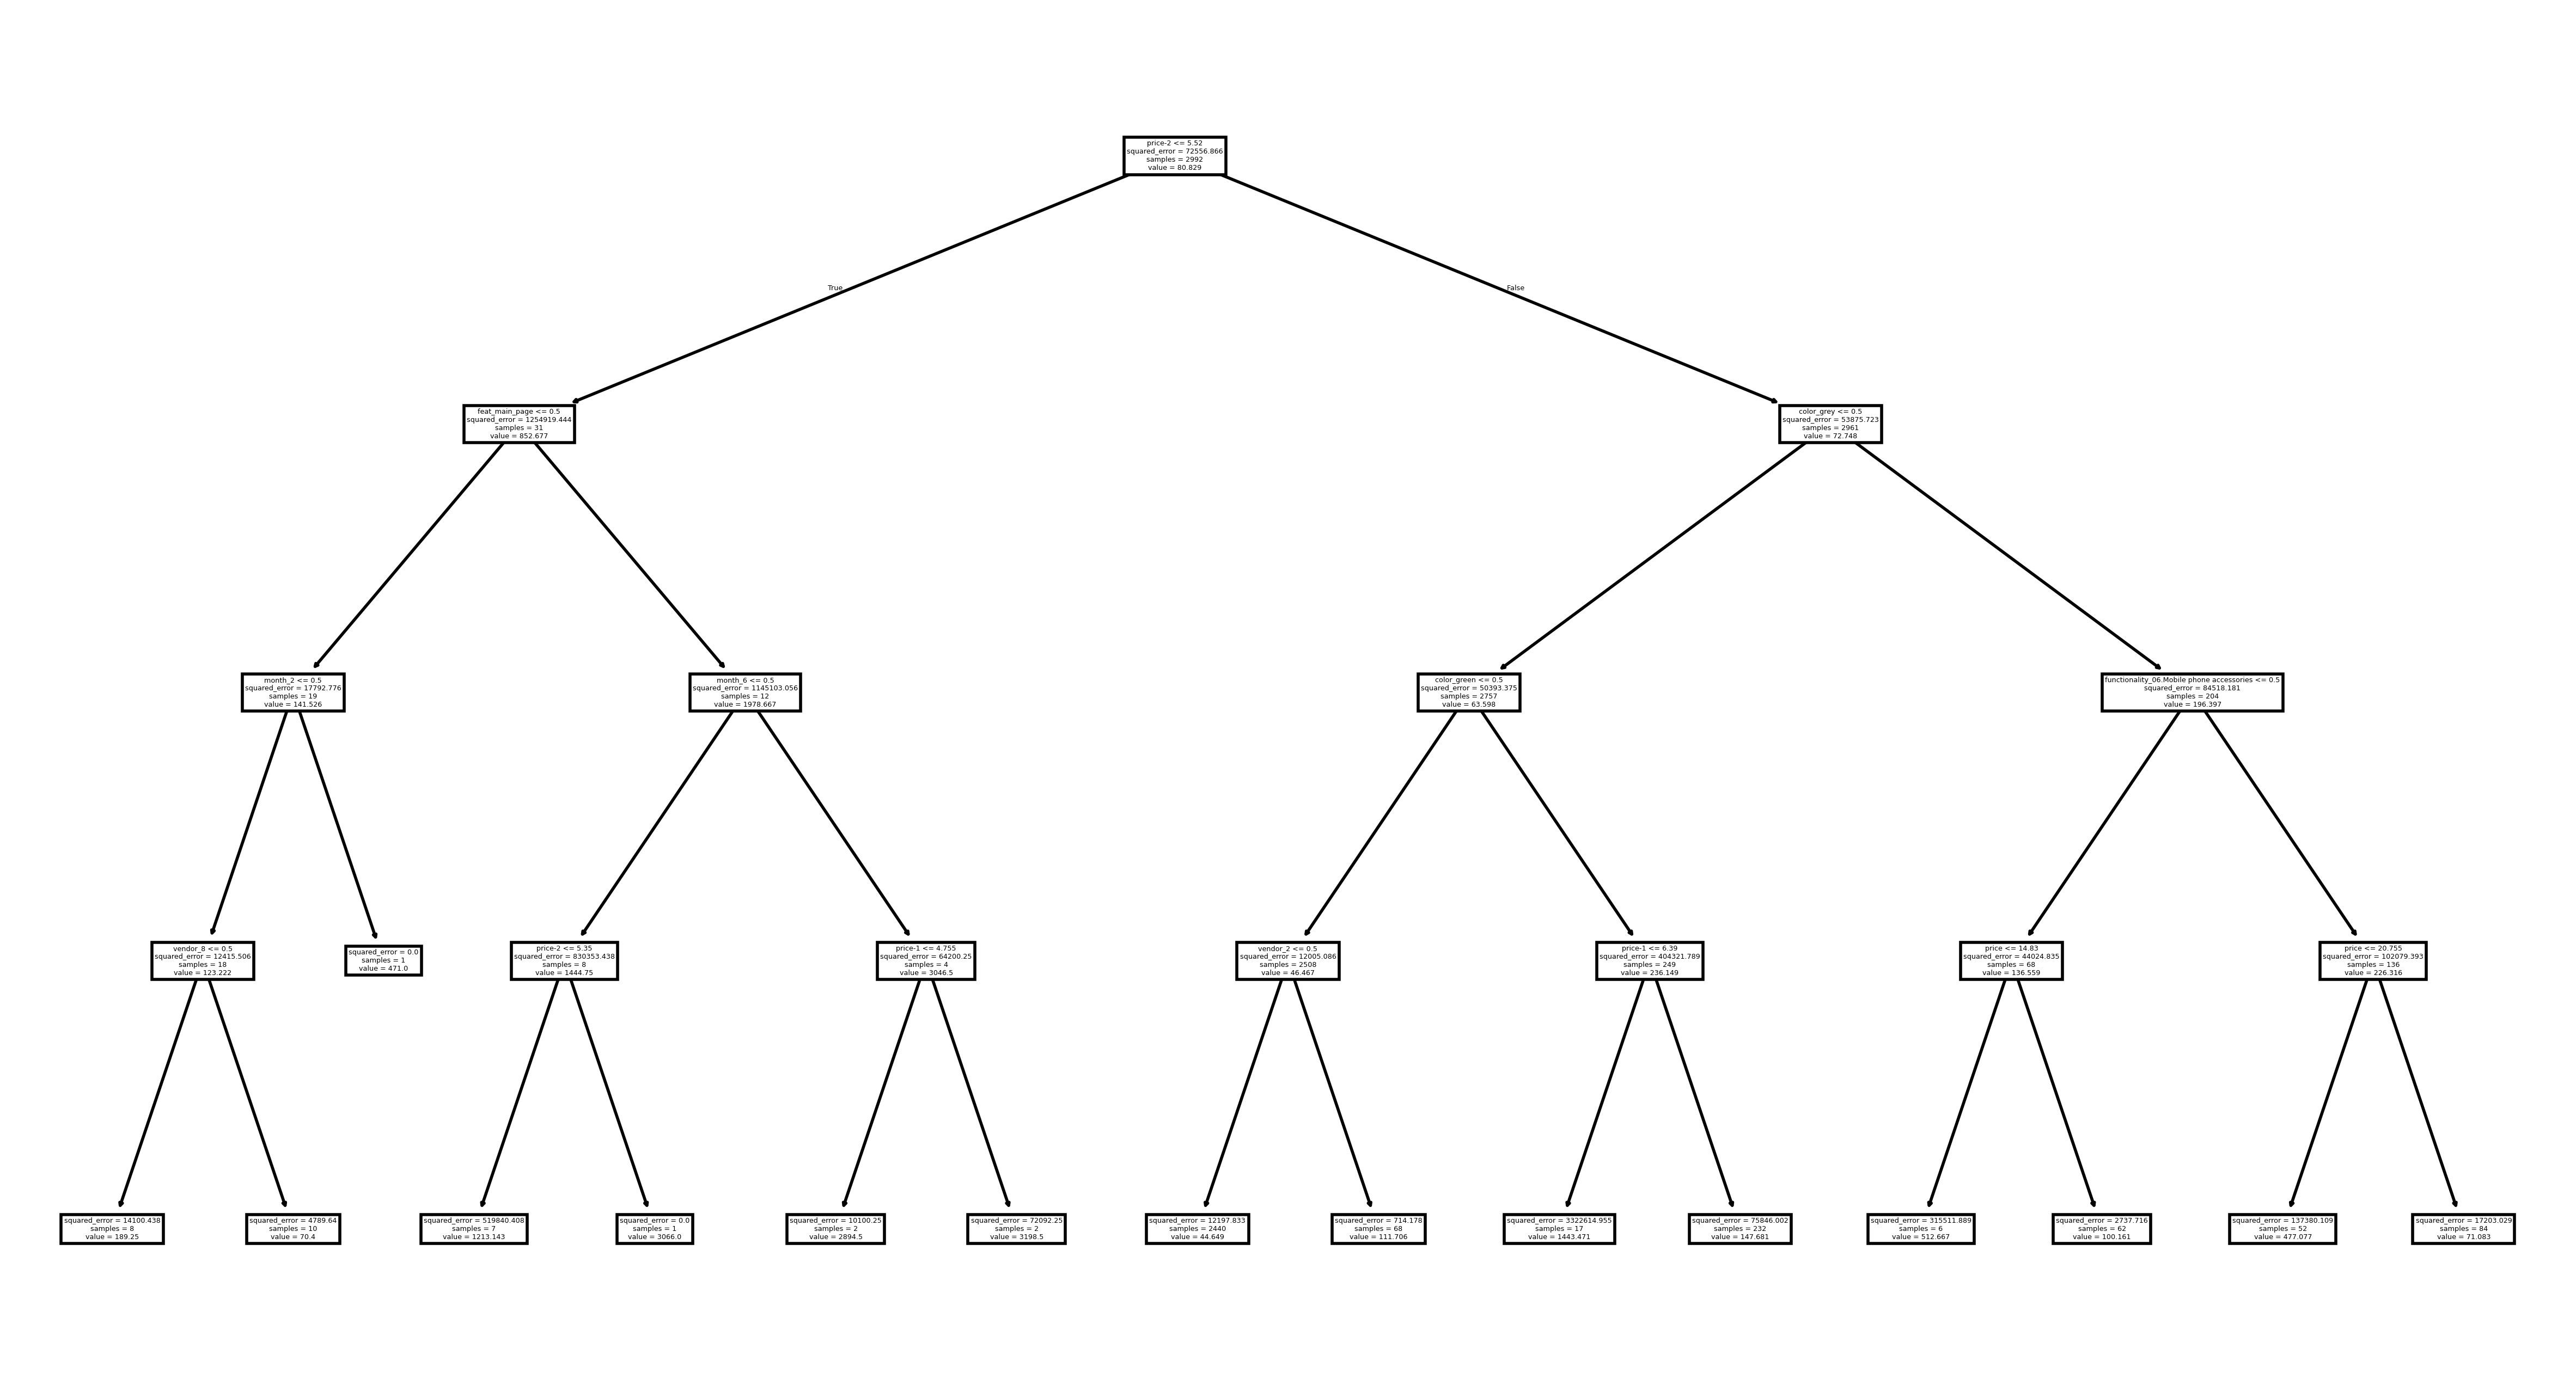

In [ ]:
### ii) Final model

import time
tZero=time.time()
DT_cen = DecisionTreeRegressor(max_features=17, max_depth=4, random_state=0)
DT_cen.fit(X_cen_train, y_cen_train)
OOS_R2 = r2_score(y_cen_test, DT_cen.predict(X_cen_test))
print("OOS R2:", round(OOS_R2,3))

t = time.time() - tZero
print("Time to compute:", round(t,3),"sec")

res['centralized-DT'] = OOS_R2

### iii) Example of a plotted tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot
plt.figure(figsize=(15,8), dpi=400)
plot_tree(DT_cen, feature_names = colnames)
plt.savefig("visualization_decision_tree.png", bbox_inches='tight')
plt.show()



In [ ]:
## b) Decentralized Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
import time
import random
# Selection of the best model:
max_features_ = list(range(2,45))
max_depth_ = list(range(2,10))
params=[]
maximum_score=0

#selection of parameters to test
random.seed(5)
mf_ = random.choices(max_features_, k=50)
md_ = random.choices(max_depth_, k=50)

## Selection of the best model
for i in range(50):
  print('Model number:', i+1)
  #selection of parameters to test
  mf = mf_[i]
  md = md_[i]
  print(' Parameters:', [mf,md])
  #model
  y_pred = []
  for i in skuSet:
    model_i = DecisionTreeRegressor(max_features=mf, max_depth=md, random_state=0)
    model_i.fit(X_dict_subsplit[i]['subtrain'], y_dict_subsplit[i]['subtrain'])
    y_pred += list(model_i.predict(X_dict_subsplit[i]['val']))
  score=r2_score(y_cen_validation, np.array(y_pred))
  print('R2', score)
  #compare performances on validation data
  if score>maximum_score:
    params = [mf,md]
    maximum_score = score

## Test on fresh data
mf,md=params
y_pred =[]
for i in skuSet:
  model_i = DecisionTreeRegressor(max_features=mf, max_depth=md, random_state=0)
  model_i.fit(X_dict[i]['train'], y_dict[i]['train'])
  y_pred += list(model_i.predict(X_dict[i]['test']))
oos_r2=r2_score(y_cen_test, np.array(y_pred))

print('\nBest Model:')
print('Parameters:', params)
print('Validation R2:', maximum_score)
print('OOS R2', oos_r2)

#Final model:
tZero=time.time()
y_pred =[]
for i in skuSet:
  model_i = DecisionTreeRegressor(max_features=14, max_depth=4, random_state=0)
  model_i.fit(X_dict[i]['train'], y_dict[i]['train'])
  y_pred += list(model_i.predict(X_dict[i]['test']))
print('OOS R2:',round(r2_score(y_cen_test, np.array(y_pred)),3))
t=time.time()-tZero
print('Time to compute:', round(t,3),'sec')

Model number: 1
 Parameters: [28, 4]
R2 0.5162018436275263
Model number: 2
 Parameters: [33, 4]
R2 0.32711653019014075
Model number: 3
 Parameters: [36, 8]
R2 0.4537604897470131
Model number: 4
 Parameters: [42, 5]
R2 0.5638531007004405
Model number: 5
 Parameters: [33, 4]
R2 0.32711653019014075
Model number: 6
 Parameters: [41, 5]
R2 0.4749854092271367
Model number: 7
 Parameters: [3, 7]
R2 -0.12287902871383816
Model number: 8
 Parameters: [22, 2]
R2 0.6039642856596048
Model number: 9
 Parameters: [42, 9]
R2 0.5588721461620016
Model number: 10
 Parameters: [29, 2]
R2 0.578291478430146
Model number: 11
 Parameters: [40, 7]
R2 0.4335609570197161
Model number: 12
 Parameters: [6, 8]
R2 -0.14124940641739148
Model number: 13
 Parameters: [22, 2]
R2 0.6039642856596048
Model number: 14
 Parameters: [12, 8]
R2 0.41402705544369023
Model number: 15
 Parameters: [25, 4]
R2 0.16601264826461537
Model number: 16
 Parameters: [26, 6]
R2 0.4565133594708505
Model number: 17
 Parameters: [2, 2]
R2 0.00

In [6]:
# 2) Random forest
## a) Centralized Random Forest

# Selection of the best model:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import time
import random

max_features_ =list(range(2,45))
max_depth_ = list(range(2,10))
params=[]
maximum_score=0

random.seed(5)
mf_ = random.choices(max_features_, k=50)
md_ = random.choices(max_depth_, k=50)

## Iterations to select best model
for i in range (50):
  print('Model number:', i+1)
  # selection of parameters to test
  mf = mf_[i]
  md = md_[i]
  #ne = ne_[i]
  print(' Parameters:',[mf,md])
  #model
  RF_cen = RandomForestRegressor(max_features=mf, max_depth=md, random_state=0)
  RF_cen.fit(X_cen_subtrain, y_cen_subtrain)
  score=r2_score(y_cen_validation, RF_cen.predict(X_cen_validation))
  print(' R2:', score)
  #compare performances on validation data
  if score > maximum_score:
    params = [mf,md]
    maximum_score = score

## Test on fresh data
#Final model:

#mf,md=params
tZero=time.time()
RF_cen = RandomForestRegressor(max_features=31, max_depth=4, random_state=0)
RF_cen.fit(X_cen_train, y_cen_train)
oos_r2=r2_score(y_cen_test, RF_cen.predict(X_cen_test))
t = time.time()-tZero

print('\nBest Model:')
print('Parameters:',params)
print('Validation R2:',maximum_score)
print('OOS R2:', oos_r2)
print("Time to compute:", round(t,3), "sec")


Model number: 1
 Parameters: [28, 4]
 R2: 0.4461114933493536
Model number: 2
 Parameters: [33, 4]
 R2: 0.43762197175744033
Model number: 3
 Parameters: [36, 8]
 R2: 0.43172929379344194
Model number: 4
 Parameters: [42, 5]
 R2: 0.44694973016153594
Model number: 5
 Parameters: [33, 4]
 R2: 0.43762197175744033
Model number: 6
 Parameters: [41, 5]
 R2: 0.4361335978630835
Model number: 7
 Parameters: [3, 7]
 R2: 0.2309302683216674
Model number: 8
 Parameters: [22, 2]
 R2: 0.3527259359598842
Model number: 9
 Parameters: [42, 9]
 R2: 0.4046187195722295
Model number: 10
 Parameters: [29, 2]
 R2: 0.3787883619741803
Model number: 11
 Parameters: [40, 7]
 R2: 0.40882491460356885
Model number: 12
 Parameters: [6, 8]
 R2: 0.3063979127249076
Model number: 13
 Parameters: [22, 2]
 R2: 0.3527259359598842
Model number: 14
 Parameters: [12, 8]
 R2: 0.33522842562118815
Model number: 15
 Parameters: [25, 4]
 R2: 0.4278402674128151
Model number: 16
 Parameters: [26, 6]
 R2: 0.44543307736659155
Model number

In [7]:
## b) decentralized Random Forest

# Selection of the best model:
max_features_ =list(range(2,45))
max_depth_ = list(range(2,10))
params=[]
maximum_score=0

# Selection of parameters to test
random.seed(5)
mf_ = random.choices(max_features_, k=50)
md_ = random.choices(max_depth_, k=50)

## Iterations to select best model
for i in range (50):
  print('Model number:', i+1)
  # selection of parameters to test
  mf = mf_[i]
  md = md_[i]
  #ne = ne_[i]
  print(' Parameters:',[mf,md])
  #model
  y_pre = []
  for i in skuSet:
    RF_i = RandomForestRegressor(max_features=mf, max_depth=md, random_state=0)
    RF_i.fit(X_dict_subsplit[i]['subtrain'], y_dict_subsplit[i]['subtrain'])
    y_pre += list(RF_i.predict(X_dict_subsplit[i]['val']))
  score=r2_score(y_cen_validation, np.array(y_pre))
  print(' R2:', score)
  #compare performances on validation data
  if score > maximum_score:
    params = [mf,md]
    maximum_score = score

## Test on fresh data
mf,md=params
y_pre=[]
for i in skuSet:
  RF_i = RandomForestRegressor(max_features=mf, max_depth=md, random_state=0)
  RF_i.fit(X_dict[i]['train'], y_dict[i]['train'])
  y_pre += list(RF_i.predict(X_dict[i]['test']))
oos_r2=r2_score(y_cen_test, np.array(y_pre))


print('\nBest Model:')
print('Parameters:',params)
print('Validation R2:',maximum_score)
print('OOS R2:', oos_r2)

# Final model
tZero=time.time()
y_pre = []
for i in skuSet:
  RF_i = RandomForestRegressor(max_features=44, max_depth=8, random_state=0)
  RF_i.fit(X_dict[i]['train'], y_dict[i]['train'])
  y_pre += list(RF_i.predict(X_dict[i]['test']))
print('OOS R2:',round(r2_score(y_cen_test, np.array(y_pre)),3))
t = time.time()-tZero
print("Time to compute:", round(t,3), "sec")



Model number: 1
 Parameters: [28, 4]
 R2: 0.4599531613994745
Model number: 2
 Parameters: [33, 4]
 R2: 0.4888646305476564
Model number: 3
 Parameters: [36, 8]
 R2: 0.5111629278165659
Model number: 4
 Parameters: [42, 5]
 R2: 0.5516584287985508
Model number: 5
 Parameters: [33, 4]
 R2: 0.4888646305476564
Model number: 6
 Parameters: [41, 5]
 R2: 0.5561856118601916
Model number: 7
 Parameters: [3, 7]
 R2: 0.21744683133804166
Model number: 8
 Parameters: [22, 2]
 R2: 0.3628585653062093
Model number: 9
 Parameters: [42, 9]
 R2: 0.5559577105635136
Model number: 10
 Parameters: [29, 2]
 R2: 0.42501532272704934
Model number: 11
 Parameters: [40, 7]
 R2: 0.5355097657424033
Model number: 12
 Parameters: [6, 8]
 R2: 0.30305425836231537
Model number: 13
 Parameters: [22, 2]
 R2: 0.3628585653062093
Model number: 14
 Parameters: [12, 8]
 R2: 0.34748443371976456
Model number: 15
 Parameters: [25, 4]
 R2: 0.44836987591365096
Model number: 16
 Parameters: [26, 6]
 R2: 0.40473934229422415
Model number:

###Author
Mohamed Badereldien Hamed